In [ ]:
# This is ChengShu Gao, Congshan Yang, Ruojia Zhang and Ryan Rosica's homework1.

In [2]:
import pandas

dataframe = pandas.read_csv('student-mat.csv')
print(dataframe.head())

for c in dataframe.columns:
    print(c)
    print(dataframe[c].value_counts(dropna=False))
print(dataframe.columns)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
school
GP    349
MS     46
Name: school, dtype: int64
sex
F    208
M    187
Name: sex, d

`1. Load csv correctly into a DataFrame and show contents in a cell`

In [3]:
from sklearn.model_selection import train_test_split

target = 'internet'
y = dataframe[target]
non_numeric = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
    'Fjob', 'reason', 'guardian']
X = dataframe.drop(labels = non_numeric+[target], axis='columns')


`3. Dataframe is correctly sliced into features and a classification target`

In [3]:
# drop non-numberic fields
yes_no = ['activities','schoolsup','famsup','paid','nursery','higher','romantic']
# map yes/no to 1/0
for c in yes_no:
    X[c] = X[c].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

`2. Dataframe is correctly split into train and holdout`

In [4]:
from sklearn import tree

classifier_model = tree.DecisionTreeClassifier()
classifier_model = classifier_model.fit(X_train, y_train)

`4. A decision tree (single tree) model is correctly instantiated and trained on the features`

In [5]:
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score

view_tree = export_text(classifier_model, feature_names=list(X.columns))
print(view_tree)

predictions = classifier_model.predict(X_test)
print(predictions)

|--- Medu <= 1.50
|   |--- absences <= 1.50
|   |   |--- studytime <= 1.50
|   |   |   |--- age <= 18.50
|   |   |   |   |--- class: yes
|   |   |   |--- age >  18.50
|   |   |   |   |--- class: no
|   |   |--- studytime >  1.50
|   |   |   |--- G2 <= 14.00
|   |   |   |   |--- romantic <= 0.50
|   |   |   |   |   |--- freetime <= 2.50
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- freetime >  2.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |--- romantic >  0.50
|   |   |   |   |   |--- class: no
|   |   |   |--- G2 >  14.00
|   |   |   |   |--- class: yes
|   |--- absences >  1.50
|   |   |--- G1 <= 8.50
|   |   |   |--- class: yes
|   |   |--- G1 >  8.50
|   |   |   |--- age <= 16.50
|   |   |   |   |--- Walc <= 3.50
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- Walc >  3.50
|   |   |   |   |   |--- Walc <= 4.50
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- Walc >  4.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |---

`5. The trained model is correctly used to make predictions on the holdout features`

In [6]:
print(accuracy_score(y_test, predictions))

0.7468354430379747


`6. The accuracy score is correctly calculated on the holdout dataset`

In [7]:
target = 'paid'
z = dataframe[target]
non_numeric = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
    'Fjob', 'reason', 'guardian']
X2 = dataframe.drop(labels = non_numeric+[target], axis='columns')
# drop non-numberic fields
yes_no = ['activities','schoolsup','famsup','romantic','nursery','higher','internet']
# map yes/no to 1/0
for c in yes_no:
    X2[c] = X2[c].map({'yes': 1, 'no': 0})

X2_train, X2_test, z_train, z_test = train_test_split(X2, z, test_size=0.2)
classifier_model2 = tree.DecisionTreeClassifier()
classifier_model2 = classifier_model2.fit(X2_train, z_train)
view_tree = export_text(classifier_model2, feature_names=list(X2.columns))
print(view_tree)

predictions = classifier_model2.predict(X2_test)
print(predictions)

print(accuracy_score(z_test, predictions))

|--- famsup <= 0.50
|   |--- Walc <= 1.50
|   |   |--- health <= 2.50
|   |   |   |--- goout <= 3.50
|   |   |   |   |--- famrel <= 3.50
|   |   |   |   |   |--- traveltime <= 1.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- traveltime >  1.50
|   |   |   |   |   |   |--- class: no
|   |   |   |   |--- famrel >  3.50
|   |   |   |   |   |--- class: no
|   |   |   |--- goout >  3.50
|   |   |   |   |--- class: yes
|   |   |--- health >  2.50
|   |   |   |--- nursery <= 0.50
|   |   |   |   |--- traveltime <= 1.50
|   |   |   |   |   |--- class: no
|   |   |   |   |--- traveltime >  1.50
|   |   |   |   |   |--- G1 <= 10.50
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- G1 >  10.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |--- nursery >  0.50
|   |   |   |   |--- class: no
|   |--- Walc >  1.50
|   |   |--- Medu <= 3.50
|   |   |   |--- studytime <= 1.50
|   |   |   |   |--- Medu <= 0.50
|   |   |   |   |   |--- class: yes
|   |   |   |   

`7. In another cell(s), code is correctly modified to retrain and test on a different classification target`

`8. Correct explanation of most important feature for decision tree in general`
- The most relavent feature that changes with the target value should be the most important feature for decision tree in general.

Feature: age, Score: 0.07960
Feature: Medu, Score: 0.03945
Feature: Fedu, Score: 0.08628
Feature: traveltime, Score: 0.03429
Feature: studytime, Score: 0.04450
Feature: failures, Score: 0.00000
Feature: schoolsup, Score: 0.00941
Feature: famsup, Score: 0.01445
Feature: paid, Score: 0.01977
Feature: activities, Score: 0.01070
Feature: nursery, Score: 0.01605
Feature: higher, Score: 0.02153
Feature: romantic, Score: 0.01516
Feature: famrel, Score: 0.00880
Feature: freetime, Score: 0.05939
Feature: goout, Score: 0.03483
Feature: Dalc, Score: 0.02074
Feature: Walc, Score: 0.04523
Feature: health, Score: 0.03945
Feature: absences, Score: 0.09700
Feature: G1, Score: 0.07460
Feature: G2, Score: 0.10801
Feature: G3, Score: 0.12078


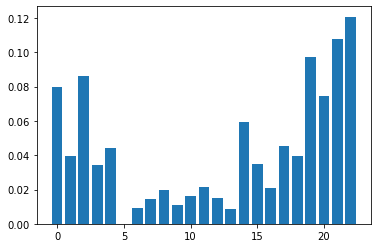

In [8]:
from matplotlib import pyplot
importance = classifier_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (list(X_test.columns)[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

`9. Discussion of most important feature for your trained decision tree on this dataset for first target (one paragraph)`
- As can be seen in the plot, the `G2` and `G3` seemed to be the most important feature for the first target(`internet`)

Feature: age, Score: 0.04935
Feature: Medu, Score: 0.07120
Feature: Fedu, Score: 0.03420
Feature: traveltime, Score: 0.03341
Feature: studytime, Score: 0.06434
Feature: failures, Score: 0.02114
Feature: schoolsup, Score: 0.00000
Feature: famsup, Score: 0.07924
Feature: activities, Score: 0.01161
Feature: nursery, Score: 0.01924
Feature: higher, Score: 0.00000
Feature: internet, Score: 0.03760
Feature: romantic, Score: 0.00000
Feature: famrel, Score: 0.04003
Feature: freetime, Score: 0.02788
Feature: goout, Score: 0.05666
Feature: Dalc, Score: 0.06867
Feature: Walc, Score: 0.05568
Feature: health, Score: 0.05528
Feature: absences, Score: 0.10116
Feature: G1, Score: 0.03502
Feature: G2, Score: 0.10076
Feature: G3, Score: 0.03753


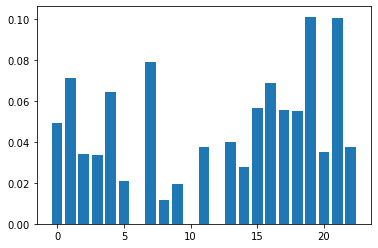

In [9]:
from matplotlib import pyplot
importance = classifier_model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (list(X2_test.columns)[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

`10. Discussion of most important feature for your trained decision tree on this dataset for second target (one paragraph)`
- As can be seen in the plot, the `G2` and `absences` seemed to be the most important feature for the second target(`paid`)